In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

In [37]:
import json
import os
import pandas as pd
import os.path

titles = ['interp','arch','us','std','bench','n','runs','warmup','samples','small']

lines = [
    

    ['pypy+','x86_64',8.40902e-7,5.99484e-09,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy+','x86_64',9.06944e-7,4.03372e-09,'a*=b N=8000',8000,25,3,5,False],
    ['pypy+','x86_64',2.21153e-06,1.52345e-05,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy+','x86_64',1.93094e-06,2.70059e-06,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy+','x86_64',1.91496e-06,3.02954e-05,'M.sum() N=5000',5000,25,3,5,False],
    
    ['pypy','x86_64',1.11222e-06,3.35994e-09,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy','x86_64',1.56713e-06,4.14026e-09,'a*=b N=8000',8000,25,3,5,False],
    ['pypy','x86_64',3.5543e-06,4.82346e-05,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy','x86_64',2.34151e-06,4.88637e-06,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy','x86_64',2.74232e-06,1.61544e-06,'M.sum() N=5000',5000,25,3,5,False],
    
    ['cpython','x86_64',3.47137e-7,3.94303e-09,'a+=42.24 N=8000',8000,25,0,5,False],
    ['cpython','x86_64',3.90053e-7,4.28969e-09,'a*=b N=8000',8000,25,0,5,False],
    ['cpython','x86_64',1.51858e-06,7.92169e-06,'M.dot(a) N=5000',5000,25,0,5,False],
    ['cpython','x86_64',1.76305e-06,3.18239e-06,'M.copy() N=2250',2250,25,0,5,False],
    ['cpython','x86_64',1.68348e-06,6.50468e-06,'M.sum() N=5000',5000,25,0,5,False],
    
    
    ['cpython','ppc64le',1.6901e-7,6.69534e-08,'a+=42.24 N=8000',8000,25,0,5,False],
    ['cpython','ppc64le',1.1606e-7,1.49217e-07,'a*=b N=8000',8000,25,0,5,False],
    ['cpython','ppc64le',4.46306e-06,9.65946e-05,'M.dot(a) N=5000',5000,25,0,5,False],
    ['cpython','ppc64le',6.65974e-07,0.00014403,'M.copy() N=2250',2250,25,0,5,False],
    ['cpython','ppc64le',3.73423e-06,0.000651911,'M.sum() N=5000',5000,25,0,5,False],
    
    
    
    ['pypy','ppc64le',4.2798e-7,2.63679e-07,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy','ppc64le',4.59621e-7,2.71826e-07,'a*=b N=8000',8000,25,3,5,False],
    ['pypy','ppc64le',8.88227e-06,0.000222929,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy','ppc64le',3.71799e-06,7.92038e-05,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy','ppc64le',8.83415e-06,0.000409661,'M.sum() N=5000',5000,25,3,5,False],
    
    
    ['pypy+','ppc64le',2.69051e-7,1.07332e-07,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy+','ppc64le',2.80972e-7,7.27302e-08,'a*=b N=8000',8000,25,3,5,False],
    ['pypy+','ppc64le',3.40021e-06,2.12257e-05,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy+','ppc64le',2.23546e-06,4.1853e-05,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy+','ppc64le',3.32166e-06,1.74927e-05,'M.sum() N=5000',5000,25,3,5,False],

    
    
    ['cpython','s390x',8.36182e-8,1.54687e-09,'a+=42.24 N=8000',8000,25,0,5,False],
    ['cpython','s390x',8.78811e-8,1.14152e-09,'a*=b N=8000',8000,25,0,5,False],
    ['cpython','s390x',5.23129e-07,0.000180907,'M.dot(a) N=5000',5000,25,0,5,False],
    ['cpython','s390x',4.02491e-07,2.78988e-05,'M.copy() N=2250',2250,25,0,5,False],
    ['cpython','s390x',2.48066e-07,1.3678e-05,'M.sum() N=5000',5000,25,0,5,False],
    
    
    ['pypy','s390x',2.56782e-7,2.38677e-09,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy','s390x',2.4539e-7,1.10954e-08,'a*=b N=8000',8000,25,3,5,False],
    ['pypy','s390x',7.38615e-07,0.000186498,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy','s390x',5.99344e-07,3.80863e-05,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy','s390x',5.52568e-07,0.000115162,'M.sum() N=5000',5000,25,3,5,False],
    
    ['pypy+','s390x',1.15612e-7,7.94617e-09,'a+=42.24 N=8000',8000,25,3,5,False],
    ['pypy+','s390x',1.10271e-7,8.81697e-09,'a*=b N=8000',8000,25,3,5,False],
    ['pypy+','s390x',4.2674e-07,8.03817e-05,'M.dot(a) N=5000',5000,25,3,5,False],
    ['pypy+','s390x',5.02816e-07,3.43464e-05,'M.copy() N=2250',2250,25,3,5,False],
    ['pypy+','s390x',3.89265e-07,5.74756e-05,'M.sum() N=5000',5000,25,3,5,False],
    
    
]
    
    

data = pd.DataFrame(lines, columns=titles)
data = data.sort_values('bench', ascending=False)
data

interp     arch            us           std            bench     n  runs  \
0     pypy+   x86_64  8.409020e-07  5.994840e-09  a+=42.24 N=8000  8000    25   
20     pypy  ppc64le  4.279800e-07  2.636790e-07  a+=42.24 N=8000  8000    25   
40    pypy+    s390x  1.156120e-07  7.946170e-09  a+=42.24 N=8000  8000    25   
25    pypy+  ppc64le  2.690510e-07  1.073320e-07  a+=42.24 N=8000  8000    25   
5      pypy   x86_64  1.112220e-06  3.359940e-09  a+=42.24 N=8000  8000    25   
35     pypy    s390x  2.567820e-07  2.386770e-09  a+=42.24 N=8000  8000    25   
15  cpython  ppc64le  1.690100e-07  6.695340e-08  a+=42.24 N=8000  8000    25   
10  cpython   x86_64  3.471370e-07  3.943030e-09  a+=42.24 N=8000  8000    25   
30  cpython    s390x  8.361820e-08  1.546870e-09  a+=42.24 N=8000  8000    25   
31  cpython    s390x  8.788110e-08  1.141520e-09      a*=b N=8000  8000    25   
26    pypy+  ppc64le  2.809720e-07  7.273020e-08      a*=b N=8000  8000    25   
16  cpython  ppc64le  1.160600e-07  1.492170e-07      a*=b N=8000  8000    25   
11  cpython   x86_64  3.900530e-07  4.289690e-09      a*=b N=8000  8000    25   
1     pypy+   x86_64  9.069440e-07  4.033720e-09      a*=b N=8000  8000    25   
36     pypy    s390x  2.453900e-07  1.109540e-08      a*=b N=8000  8000    25   
6      pypy   x86_64  1.567130e-06  4.140260e-09      a*=b N=8000  8000    25   
41    pypy+    s390x  1.102710e-07  8.816970e-09      a*=b N=8000  8000    25   
21     pypy  ppc64le  4.596210e-07  2.718260e-07      a*=b N=8000  8000    25   
29    pypy+  ppc64le  3.321660e-06  1.749270e-05   M.sum() N=5000  5000    25   
34  cpython    s390x  2.480660e-07  1.367800e-05   M.sum() N=5000  5000    25   
39     pypy    s390x  5.525680e-07  1.151620e-04   M.sum() N=5000  5000    25   
24     pypy  ppc64le  8.834150e-06  4.096610e-04   M.sum() N=5000  5000    25   
44    pypy+    s390x  3.892650e-07  5.747560e-05   M.sum() N=5000  5000    25   
9      pypy   x86_64  2.742320e-06  1.615440e-06   M.sum() N=5000  5000    25   
4     pypy+   x86_64  1.914960e-06  3.029540e-05   M.sum() N=5000  5000    25   
14  cpython   x86_64  1.683480e-06  6.504680e-06   M.sum() N=5000  5000    25   
19  cpython  ppc64le  3.734230e-06  6.519110e-04   M.sum() N=5000  5000    25   
32  cpython    s390x  5.231290e-07  1.809070e-04  M.dot(a) N=5000  5000    25   
42    pypy+    s390x  4.267400e-07  8.038170e-05  M.dot(a) N=5000  5000    25   
2     pypy+   x86_64  2.211530e-06  1.523450e-05  M.dot(a) N=5000  5000    25   
37     pypy    s390x  7.386150e-07  1.864980e-04  M.dot(a) N=5000  5000    25   
7      pypy   x86_64  3.554300e-06  4.823460e-05  M.dot(a) N=5000  5000    25   
22     pypy  ppc64le  8.882270e-06  2.229290e-04  M.dot(a) N=5000  5000    25   
12  cpython   x86_64  1.518580e-06  7.921690e-06  M.dot(a) N=5000  5000    25   
27    pypy+  ppc64le  3.400210e-06  2.122570e-05  M.dot(a) N=5000  5000    25   
17  cpython  ppc64le  4.463060e-06  9.659460e-05  M.dot(a) N=5000  5000    25   
33  cpython    s390x  4.024910e-07  2.789880e-05  M.copy() N=2250  2250    25   
8      pypy   x86_64  2.341510e-06  4.886370e-06  M.copy() N=2250  2250    25   
13  cpython   x86_64  1.763050e-06  3.182390e-06  M.copy() N=2250  2250    25   
28    pypy+  ppc64le  2.235460e-06  4.185300e-05  M.copy() N=2250  2250    25   
38     pypy    s390x  5.993440e-07  3.808630e-05  M.copy() N=2250  2250    25   
3     pypy+   x86_64  1.930940e-06  2.700590e-06  M.copy() N=2250  2250    25   
18  cpython  ppc64le  6.659740e-07  1.440300e-04  M.copy() N=2250  2250    25   
43    pypy+    s390x  5.028160e-07  3.434640e-05  M.copy() N=2250  2250    25   
23     pypy  ppc64le  3.717990e-06  7.920380e-05  M.copy() N=2250  2250    25   

    warmup  samples  small  
0        3        5  False  
20       3        5  False  
40       3        5  False  
25       3        5  False  
5        3        5  False  
35       3        5  False  
15       0        5  False  
10       0        5  False  
30       0       

In [38]:
def ftime(time, err):
    return [v * 1000.0 * 1000.0 for v in time], \
           [e * 1000.0 * 1000.0 for e in err]

def plot(arch):
    small_bench = data[data.arch == arch]
    
    pypyp8_x86 = small_bench[small_bench.interp == 'pypy+']
    pypy8_x86 = small_bench[small_bench.interp == 'pypy']
    cpython8_x86 = small_bench[small_bench.interp == 'cpython']

    N = len(pypyp8_x86)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.25       # the width of the bars

    timepypyp, errpypyp = ftime(pypyp8_x86['us'].tolist(), pypyp8_x86['std'].tolist())
    timepypy, errpypy = ftime(pypy8_x86['us'].tolist(), pypy8_x86['std'].tolist())
    timecpython, errcpython = ftime(cpython8_x86['us'].tolist(), cpython8_x86['std'].tolist())
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, timepypyp, width, color='#e92262') #, yerr=errpypyp)
    rects2 = ax.bar(ind + width, timepypy, width, color='#aa98aa') #, yerr=errpypy)
    rects3 = ax.bar(ind + 2*width, timecpython, width, color='#83A9F4') #, yerr=errcpython)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Time (us), less is better')
    ax.set_title('MicroNumPy VecOpt ' + arch)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(pypyp8_x86['bench'].tolist(), rotation=45)

    ax.legend((rects1[0], rects2[0], rects3[0]),
              ('PyPy+', 'PyPy', 'CPython'))


    def autolabel(rects):
    # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

    plt.show()



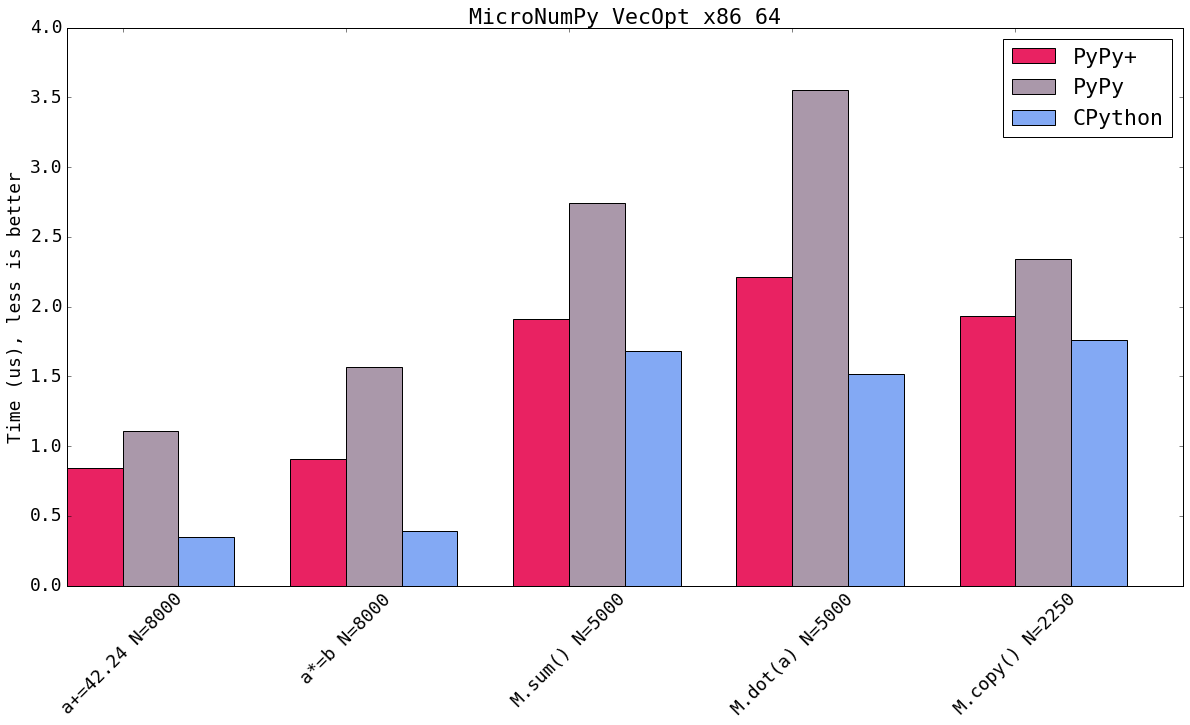

In [39]:
plot('x86_64')

In [40]:
plot('ppc64le')

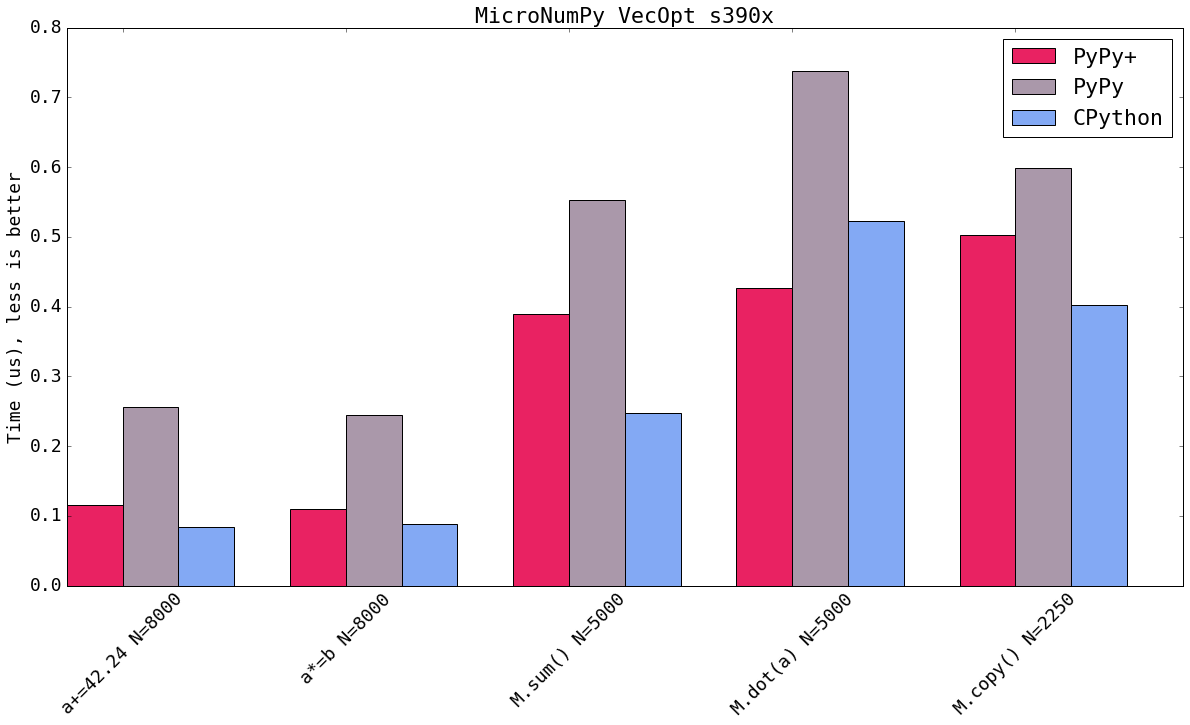

In [41]:
plot('s390x')